<a href="https://colab.research.google.com/github/kalyani-pawase-pune/EDA1/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 : Reading and Understanding Data¶

In [ ]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# Reading the data on which analysis needs to be done

retail = pd.read_csv('/content/drive/MyDrive/kkkkkkkkk.csv', sep=",", encoding="ISO-8859-1", header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# shape of df

retail.shape

(541909, 8)

In [ ]:
# df info

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# df description

retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Step 2 : Data Cleansing

In [ ]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

,0
InvoiceNo,0.00
StockCode,0.00
Description,0.27
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,24.93
Country,0.00


In [ ]:
# Droping rows having missing values

retail = retail.dropna()
retail.shape

(406829, 8)

In [ ]:
# Changing the datatype of Customer Id as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

Step 3 : Data Preparation¶

We are going to analysis the Customers based on below 3 factors:
R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

In [ ]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# New Attribute : Recency

# Convert to datetime to proper datatype
# Changed the format to '%d/%m/%y %H:%M' to handle two-digit years
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format='%d/%m/%y %H:%M', errors='coerce')
# errors='coerce' will set invalid parsing to NaT, allowing further investigation if needed

In [ ]:
retail = pd.read_csv('/content/drive/MyDrive/kkkkkkkkk.csv')

In [ ]:
print(retail['InvoiceDate'].astype(str).unique()[:10])

['12/01/2010 08:26' '12/01/2010 08:28' '12/01/2010 08:34'
 '12/01/2010 08:35' '12/01/2010 08:45' '12/01/2010 09:00'
 '12/01/2010 09:01' '12/01/2010 09:02' '12/01/2010 09:09'
 '12/01/2010 09:32']


In [ ]:
print(retail.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
retail.columns = retail.columns.str.strip()  # remove extra spaces

In [ ]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], errors='coerce', dayfirst=True)

In [ ]:
max_date = retail['InvoiceDate'].max()
print("Last transaction date:", max_date)

Last transaction date: 2011-12-10 17:19:00


In [ ]:
print("Valid dates:", retail['InvoiceDate'].notna().sum())
print("Missing dates:", retail['InvoiceDate'].isna().sum())

Valid dates: 232959
Missing dates: 308950


In [ ]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], errors='coerce', dayfirst=True)

In [ ]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], errors='coerce')

In [ ]:
print(retail['InvoiceDate'].head())

0   2010-01-12 08:26:00
1   2010-01-12 08:26:00
2   2010-01-12 08:26:00
3   2010-01-12 08:26:00
4   2010-01-12 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [ ]:
print(retail['InvoiceDate'].head(10))
print(retail['InvoiceDate'].dtype)

0   2010-01-12 08:26:00
1   2010-01-12 08:26:00
2   2010-01-12 08:26:00
3   2010-01-12 08:26:00
4   2010-01-12 08:26:00
5   2010-01-12 08:26:00
6   2010-01-12 08:26:00
7   2010-01-12 08:28:00
8   2010-01-12 08:28:00
9   2010-01-12 08:34:00
Name: InvoiceDate, dtype: datetime64[ns]
datetime64[ns]


In [ ]:
max_date = retail['InvoiceDate'].max()
print(max_date)

2011-12-10 17:19:00


In [ ]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697 days 08:53:00


In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,NaT
1,12347.0,95 days 04:18:00
2,12348.0,220 days 06:32:00
3,12349.0,NaT
4,12350.0,311 days 01:18:00


In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,NaN
1,12347.0,95.0
2,12348.0,220.0
3,12349.0,NaN
4,12350.0,311.0


There are 2 types of outliers and we will treat outliers as it can skew our dataset¶
Statistical
Domain specific

Text(0.5, 0, 'Attributes')

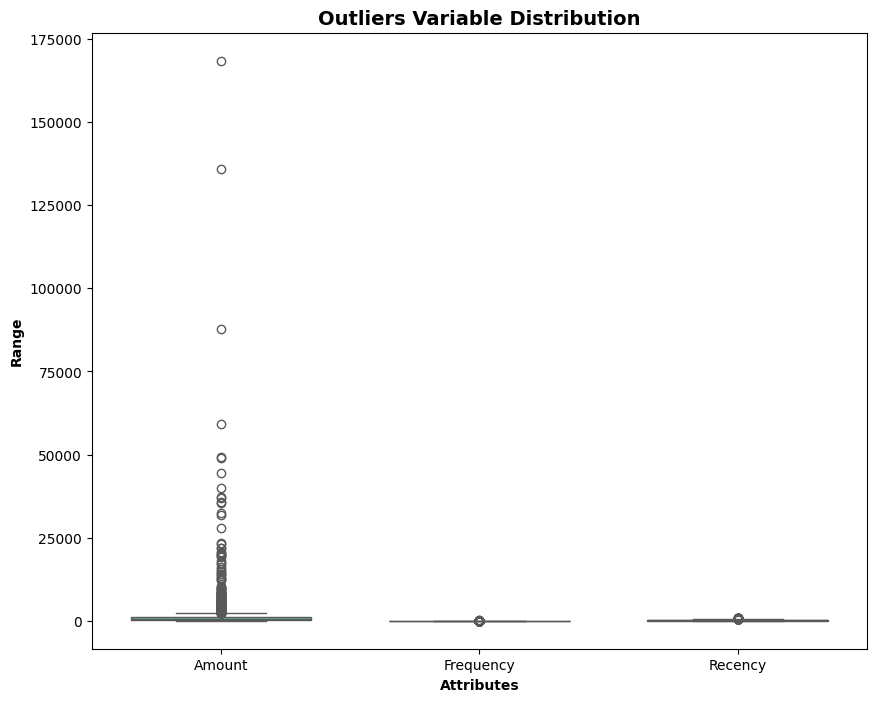

In [ ]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Rescaling the Attributes¶
It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

In [ ]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(2936, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled) # Now rfm_df_scaled is defined and can be used
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,1.677562,1.288593,-0.438292
1,-0.452160,-0.627977,0.453597
2,-0.484106,-0.627977,1.102893
3,0.458589,0.330308,0.838894
4,-0.361612,-0.627977,-0.431157


Step 4 : Building the Model¶

K-Means Clustering¶
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly.

We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.

We repeat the process for a given number of iterations and at the end, we have our clusters.


In [ ]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([0, 1, 2, ..., 1, 0, 1], dtype=int32)

Finding the Optimal Number of Clusters¶

Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

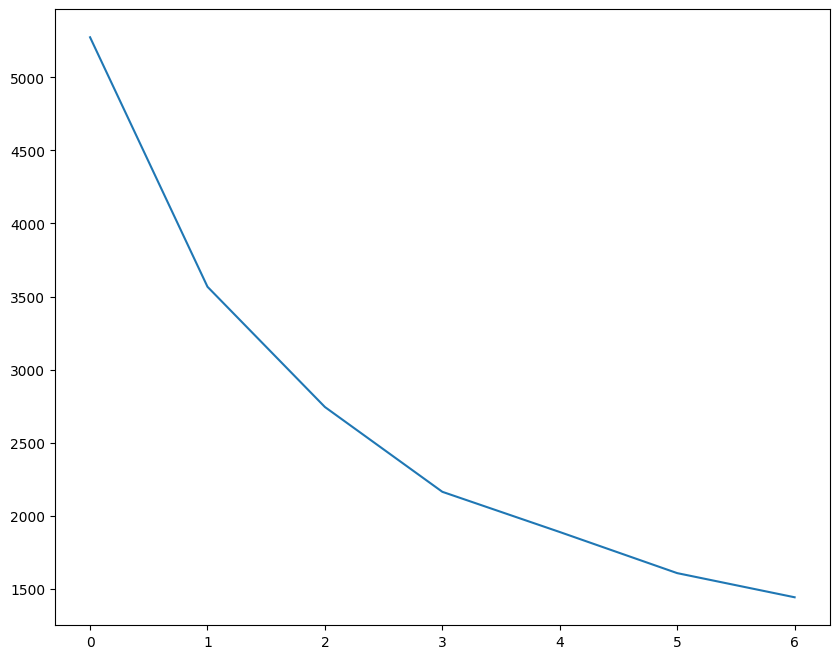

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

Silhouette Analysis¶
silhouette score=p−qmax(p,q)
p
 is the mean distance to the points in the nearest cluster that the data point is not a part of

q
 is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5260655805437914
For n_clusters=3, the silhouette score is 0.3961434797385919
For n_clusters=4, the silhouette score is 0.39187137718727955
For n_clusters=5, the silhouette score is 0.38300177397562335
For n_clusters=6, the silhouette score is 0.38339452490878817
For n_clusters=7, the silhouette score is 0.38327424999513804
For n_clusters=8, the silhouette score is 0.3374811597710715


In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
 kmeans.labels_

array([1, 0, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12347.0,2540.29,5,95,1
1,12348.0,367.00,1,220,0
2,12350.0,334.40,1,311,0
3,12352.0,1296.38,3,274,0
4,12355.0,459.40,1,96,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

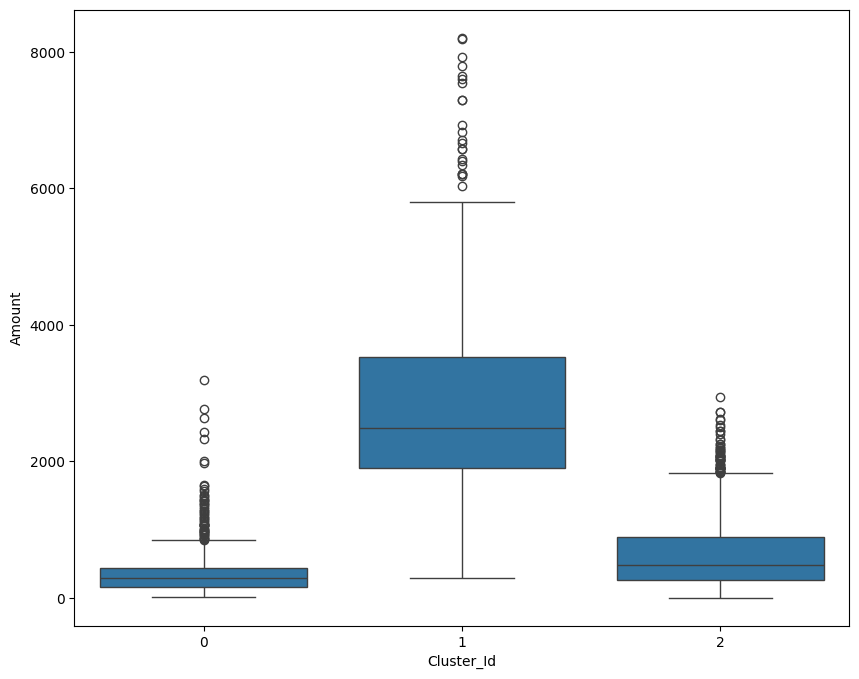

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

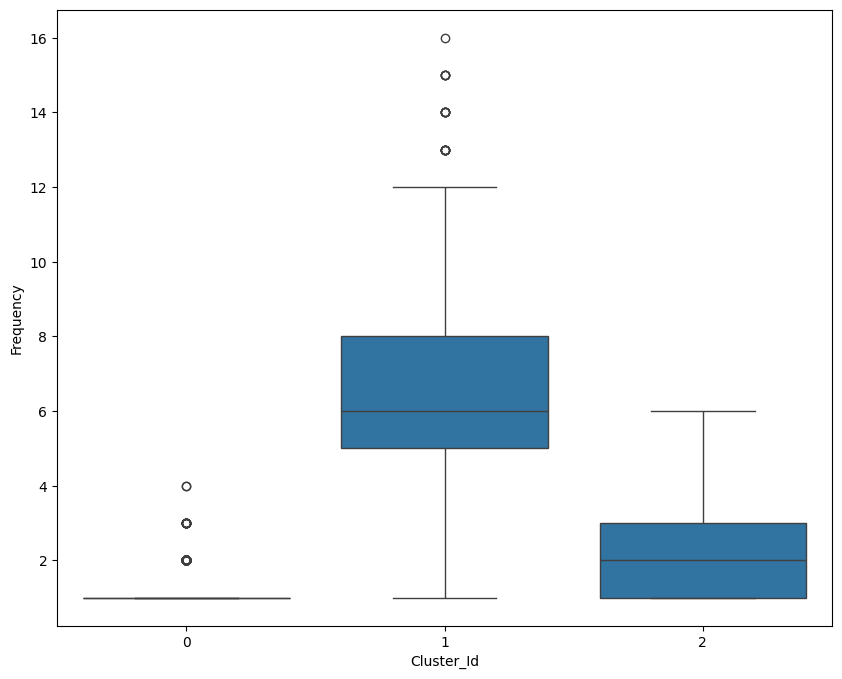

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

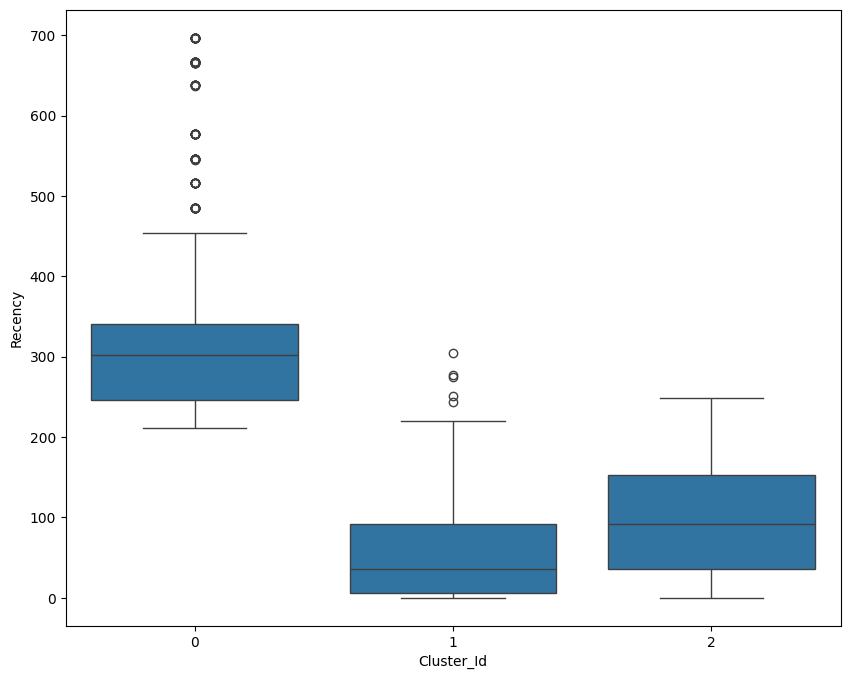

In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

Hierarchical Clustering¶

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom.
For example, all files and folders on the hard disk are organized in a hierarchy.
 There are two types of hierarchical clustering,

Divisive
Agglomerative.

Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

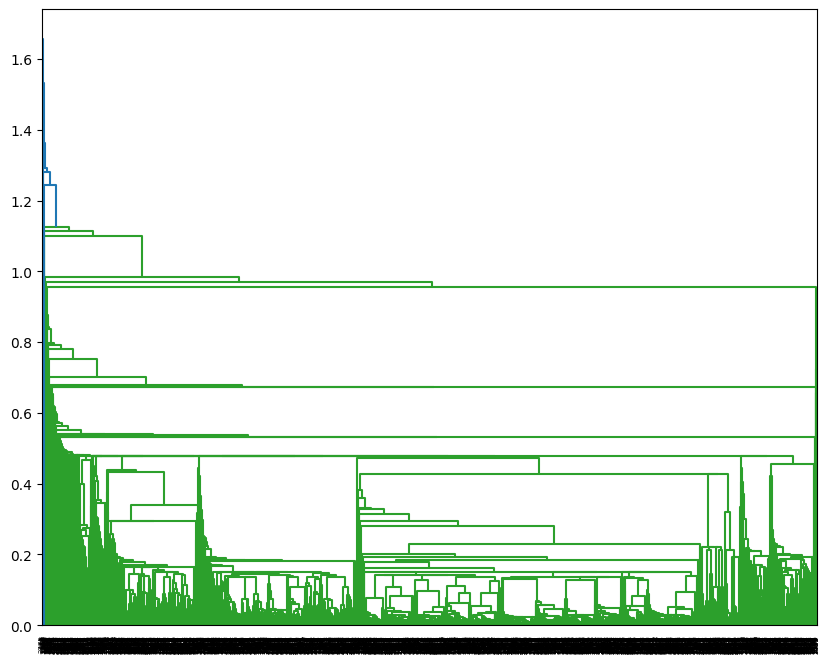

In [ ]:
# Single linkage:

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

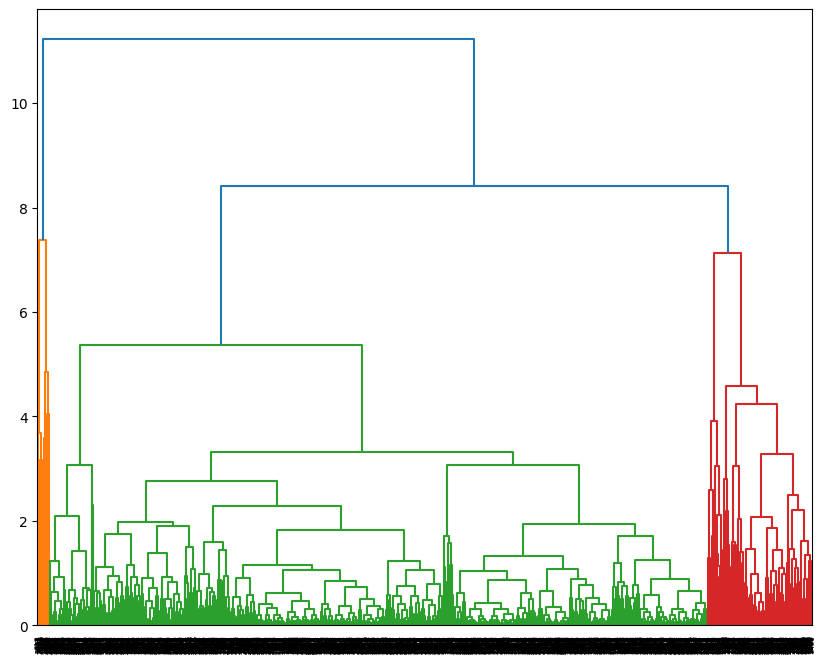

In [ ]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Average Linkage:

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

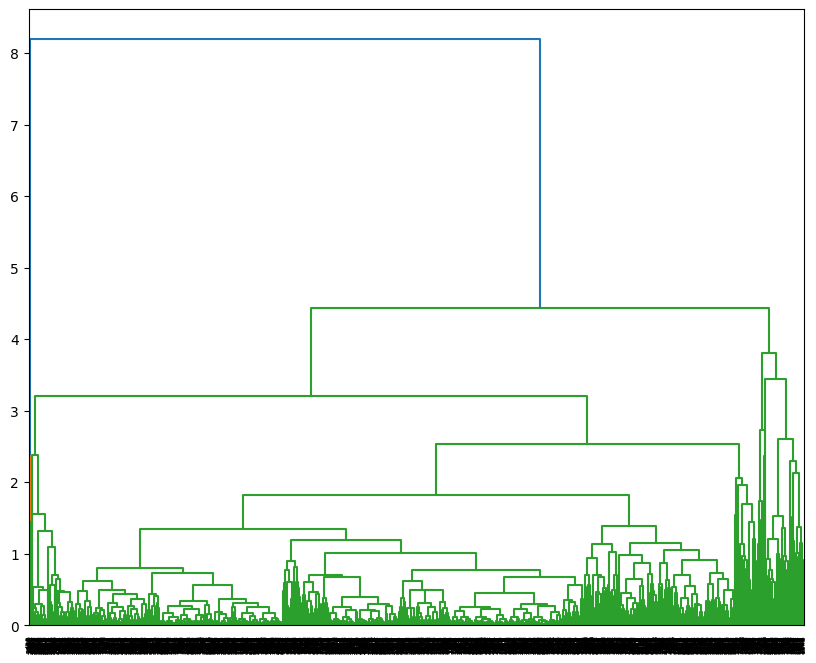

In [ ]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

Cutting the Dendrogram based on K¶


In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12347.0,2540.29,5,95,1,0
1,12348.0,367.00,1,220,0,0
2,12350.0,334.40,1,311,0,0
3,12352.0,1296.38,3,274,0,0
4,12355.0,459.40,1,96,2,0


<Axes: xlabel='Cluster_Labels', ylabel='Amount'>

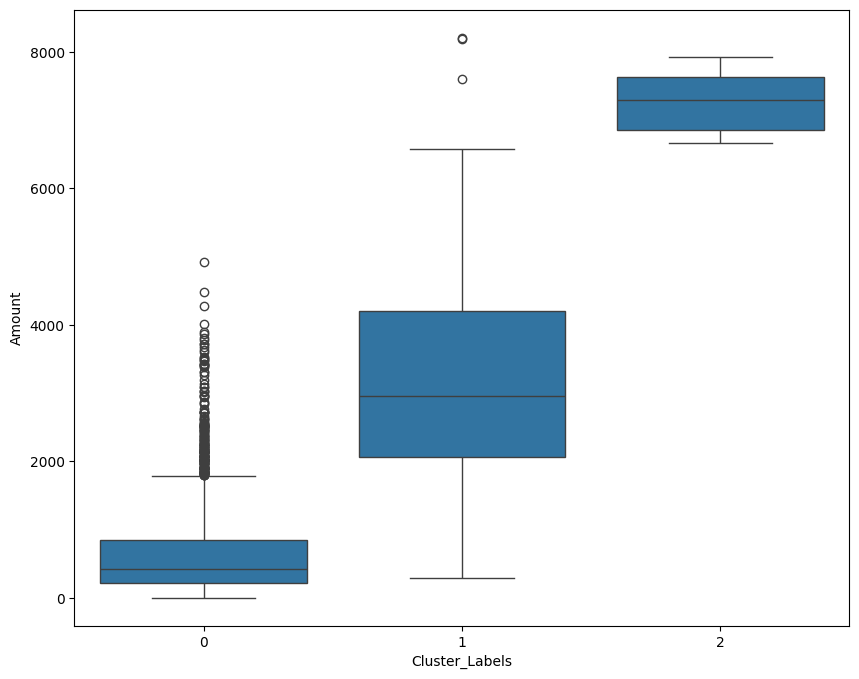

In [ ]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Labels', ylabel='Frequency'>

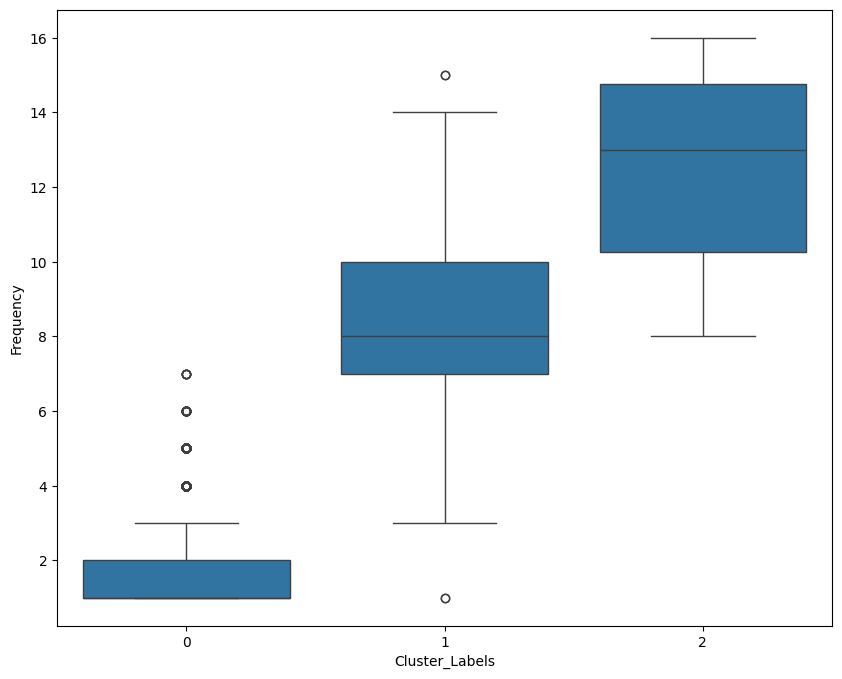

In [ ]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Labels', ylabel='Recency'>

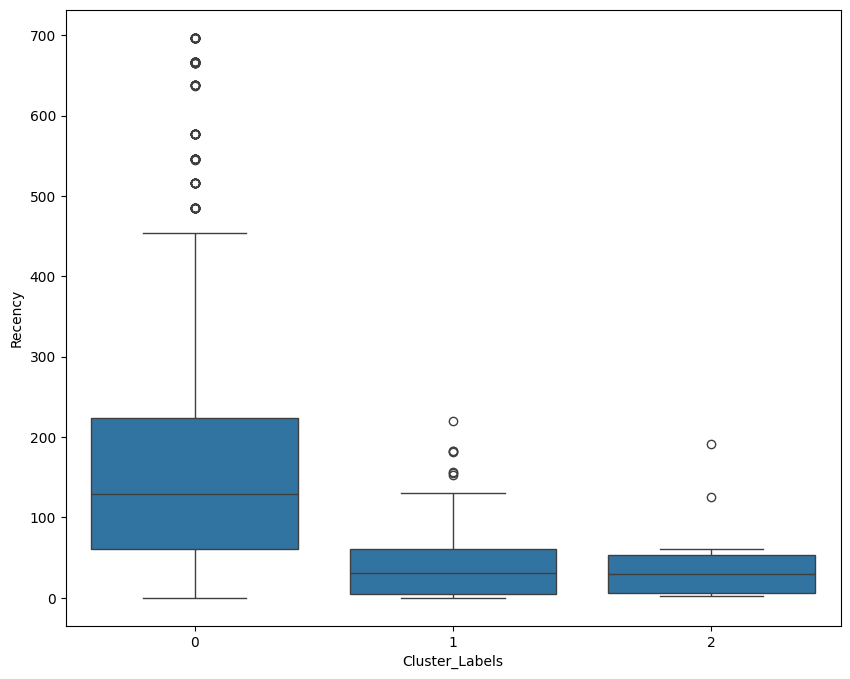

In [ ]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

Step 5 : Final Analysis¶

Inference:¶

K-Means Clustering with 3 Cluster Ids

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.

Customers with Cluster Id 1 are frequent buyers.

Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.


Hierarchical Clustering with 3 Cluster Labels

Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.

Customers with Cluster_Labels 2 are frequent buyers.

Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.
